In [1]:
# import the necessary libraries
import librosa
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import sklearn.preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
# define the sample audio path
audio_path = "E:\\personal files\\dataset\\Language Detection Dataset\\Malayalam\\9999.mp3"

# Visualising the audio

In [3]:
# analysing the output of librosa.load(audio file)
y, sr = librosa.load(audio_path)
print("The {} is stored as:- {} format with a shape of: {}".format(audio_path,type(y),y.shape))
print("The format of the sampling rate is:- ",type(sr))

The E:\personal files\dataset\Language Detection Dataset\Malayalam\9999.mp3 is stored as:- <class 'numpy.ndarray'> format with a shape of: (109831,)
The format of the sampling rate is:-  <class 'int'>


In [4]:
# playing the audio file
ipd.Audio(audio_path)

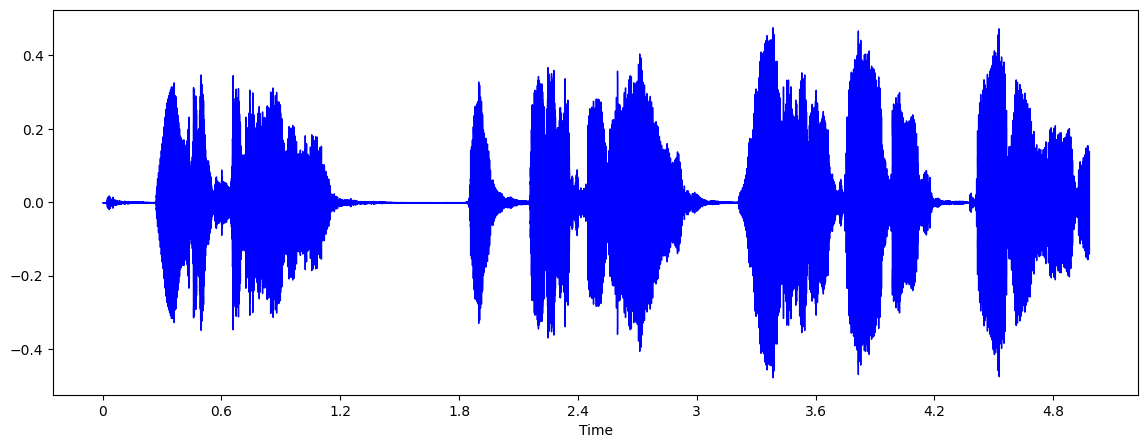

In [5]:
# displaying the audio file in the wave format.
y, sr = librosa.load(audio_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='blue')

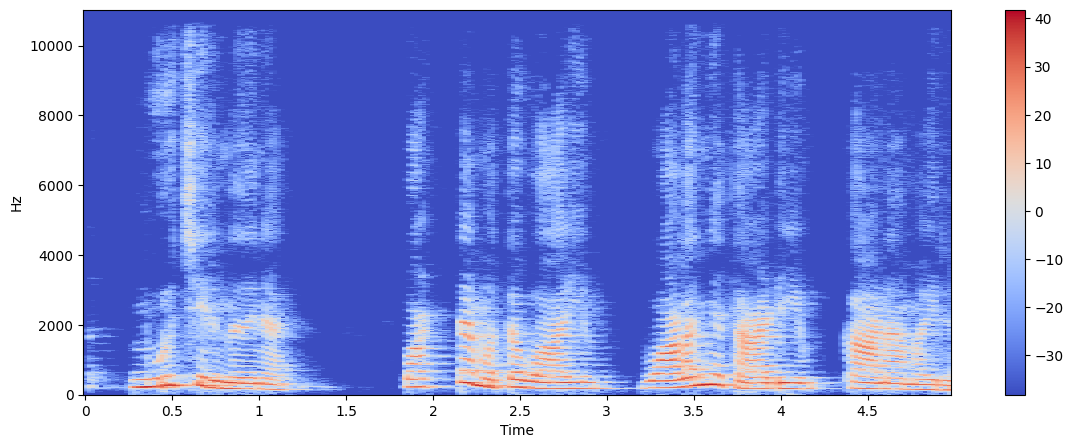

In [6]:
#display Spectrogram
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

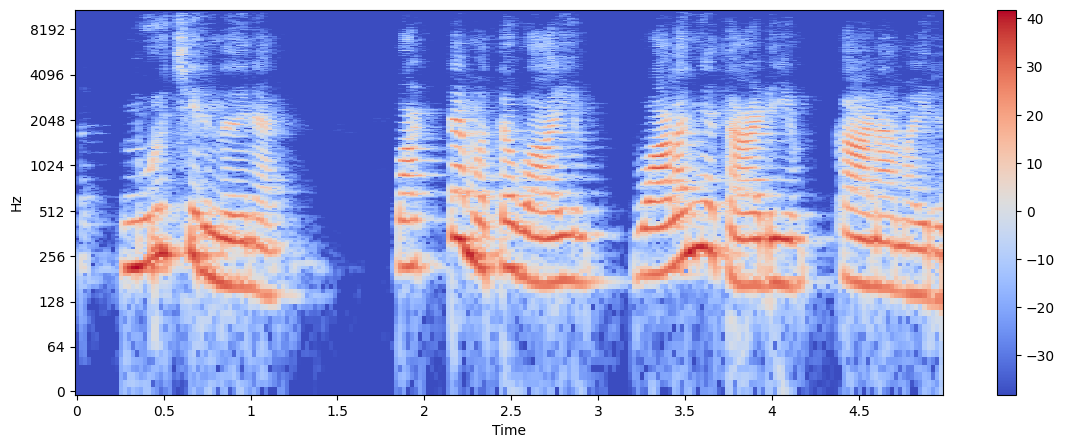

In [7]:
# plotting Spectrogram based on the log of frequencies
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

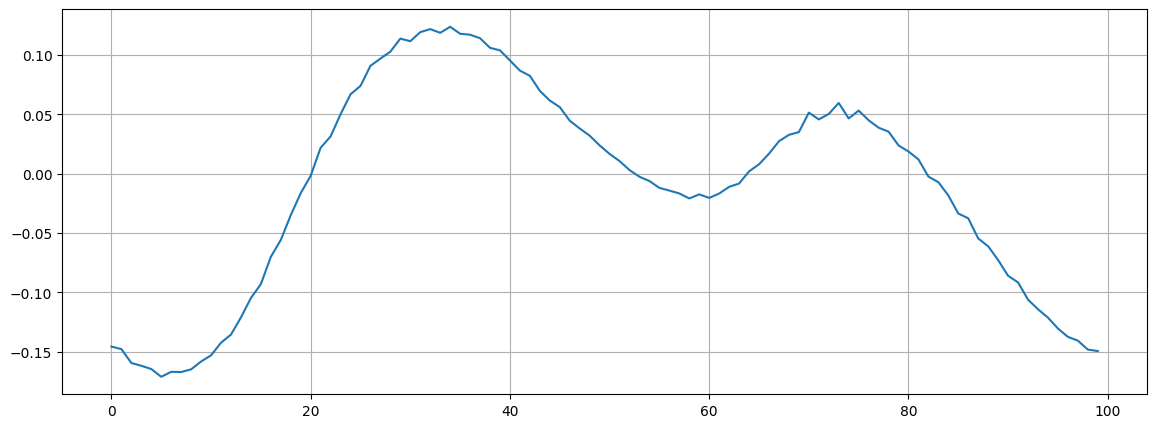

In [8]:
# Zooming in
# This code zooms in on a specific segment of an audio signal (defined by the indices n0 and n1) and plots the waveform of that segment, 
# providing a detailed view of the audio signal in that particular range. 
# This type of visualization is often useful in audio analysis to inspect specific portions of the signal for characteristics such as amplitude, frequency content, or other features.

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()


In [9]:
# In audio analysis, zero-crossings are often used as a feature to characterize the rate of change in the audio signal. 
# A high number of zero-crossings can indicate a signal with rapid changes in amplitude, which might be associated with percussive or high-frequency components.
# This information can be valuable for tasks such as audio classification or segmentation.

zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

4


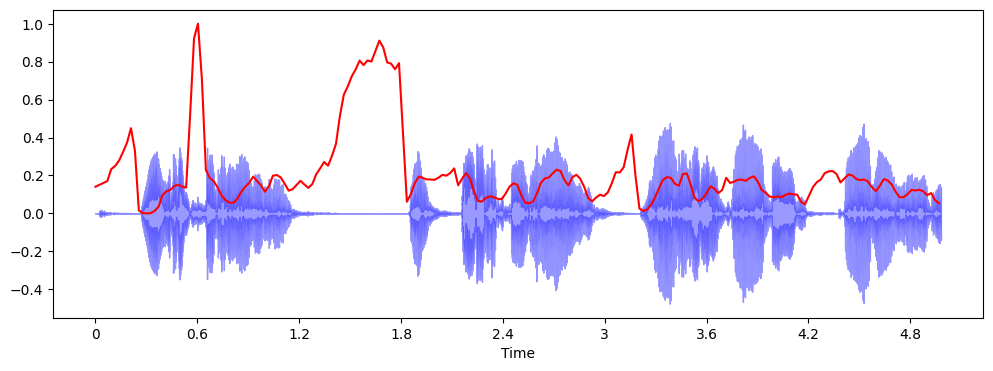

In [10]:
# spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

# spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sk.minmax_scale(y, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')
plt.plot(t, normalize(spectral_centroids), color='r')

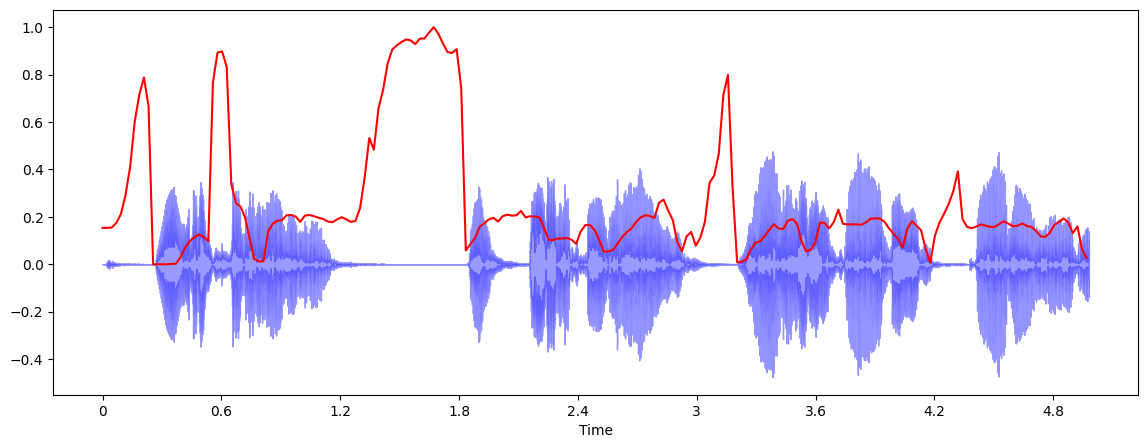

In [11]:
# generates a visual representation of an audio signal, overlaying the waveform in blue and plotting the normalized spectral rolloff in red. 
# This provides insights into the frequency content of the audio signal and highlight the regions where most of the spectral energy is concentrated. 
# The spectral rolloff information can be valuable in tasks such as music genre classification or audio content analysis.

# spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')

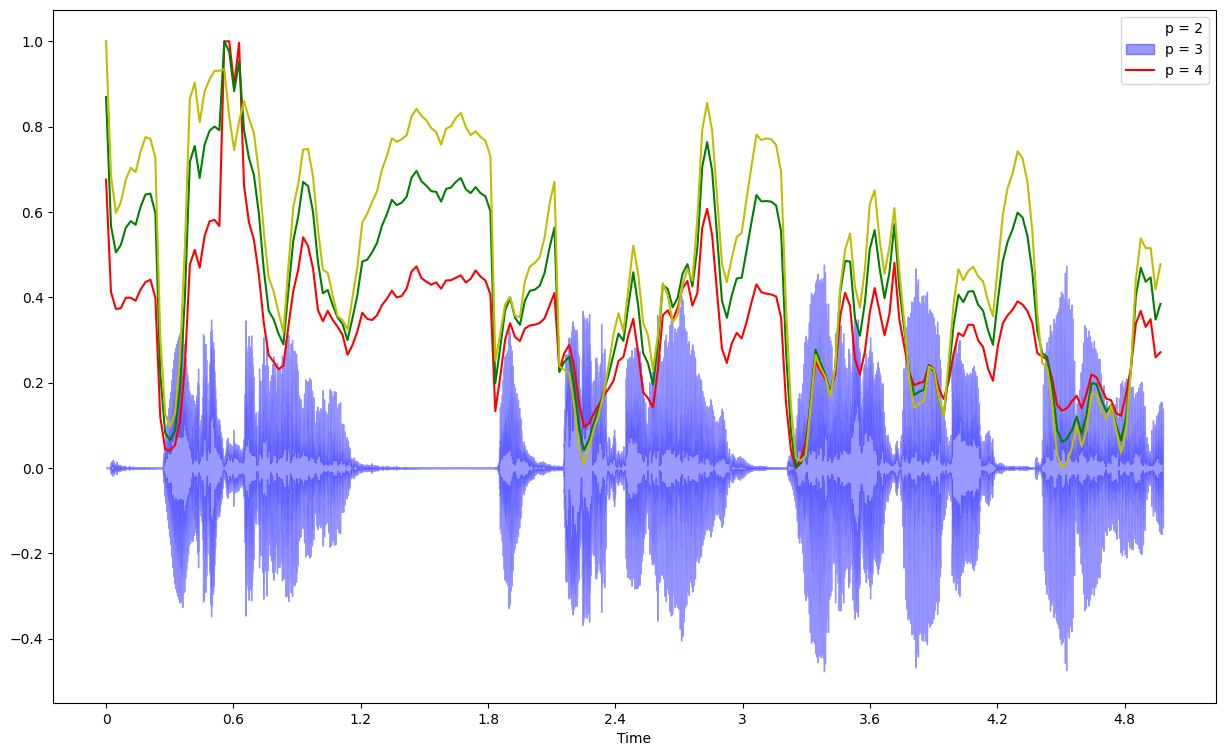

In [12]:
# visual representation of the spectral bandwidth of an audio signal for different power parameters. 
# The variations in spectral bandwidth for different 'p' values can give insights into the distribution of frequencies in the audio signal.

# spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
# spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
# spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 9))

librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')

plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

(20, 215)


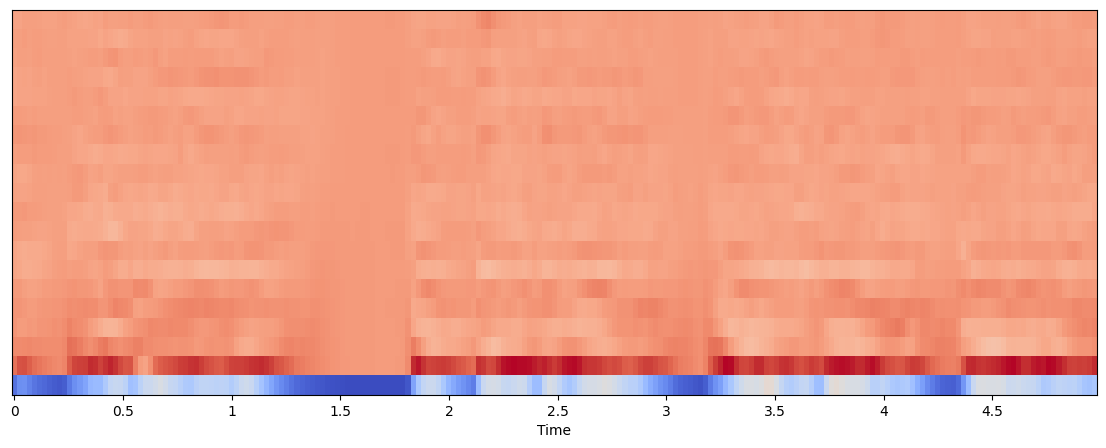

In [13]:
# computes the MFCCs of an audio signal and then displays them as a spectrogram. 
# MFCCs are commonly used in audio analysis, especially in tasks like speech and sound recognition, 
# because they capture important features of the audio signal that are relevant for distinguishing between different sounds. 
# The spectrogram visualization provides a time-frequency representation of the MFCCs, making it easier to interpret the audio features over time.

#mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [14]:
#load the csv file
csv_file="Indian-Languages-dataset.csv"
data = pd.read_csv(csv_file)

In [15]:
# view the no of rows and columns of the csv file
data.shape

(200010, 26)

In [16]:
# value_count of target variable
data['target'].value_counts()

target
Bengali      20001
Gujarati     20001
Hindi        20001
Kannada      20001
Malayalam    20001
Marathi      20001
Punjabi      20001
Tamil        20001
Telugu       20001
Urdu         20001
Name: count, dtype: int64

In [17]:
# extract the unique values of target variable
target_list = set(data['target'])

In [18]:
# print the list
target_list

{'Bengali',
 'Gujarati',
 'Hindi',
 'Kannada',
 'Malayalam',
 'Marathi',
 'Punjabi',
 'Tamil',
 'Telugu',
 'Urdu'}

In [19]:
# sample_5000 with 5000 each audio data
sample_5000 = pd.DataFrame(columns=data.columns)


In [20]:
# sample_500 with 500 each audio data for online learning
sample_500 = pd.DataFrame(columns=data.columns)

In [21]:
# iterate through the labels and extract the required number of data
for label in target_list:
    print(label,"label")
    sample1 = data[data['target']==label][:5000] # extract the first 5000 rows of each audio
    sample2 = data[data['target']==label][5000:5500] # extract the next 500 rows of each audio
    sample_5000 = pd.concat([sample1, sample_5000], ignore_index=True) # concatinate sample1 with sample_500 to get the training data
    sample_500 = pd.concat([sample2, sample_500], ignore_index=True) # concatinate sample2 with sample_5000 to get the new data for online learning

Tamil label
Urdu label
Gujarati label
Hindi label
Punjabi label
Malayalam label
Marathi label
Bengali label


C:\Users\AKHIL JX\AppData\Local\Temp\ipykernel_31748\4259587466.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sample_5000 = pd.concat([sample1, sample_5000], ignore_index=True)
C:\Users\AKHIL JX\AppData\Local\Temp\ipykernel_31748\4259587466.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sample_500 = pd.concat([sample2, sample_500], ignore_index=True)


Telugu label
Kannada label


In [22]:
# print the shape of sample_5000
sample_5000.shape

(50000, 26)

In [23]:
# print the first 5 rows of sample_5000
sample_5000.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.432293,0.018029,1795.637862,1328.401261,3293.828920,-356.733154,141.424911,-79.846466,21.805471,-47.767330,...,-3.949224,-16.981901,8.634361,-5.330009,0.258652,1.953027,-3.342288,4.735175,-5.251695,Kannada
1,0.424062,0.025388,1900.689305,1320.260160,3472.554506,-331.391846,142.504044,-99.363937,18.441051,-52.818413,...,3.409961,-18.231478,7.326301,-0.420460,0.299303,-0.143654,-0.282789,0.299845,-7.883241,Kannada
2,0.371588,0.030344,1793.606333,1271.708829,3217.511242,-310.344727,151.672852,-105.912865,19.482447,-54.435764,...,1.066625,-16.350510,8.973021,0.807869,1.427381,-0.695197,0.731557,1.018743,-3.212535,Kannada
3,0.406305,0.037920,1845.593660,1294.448155,3293.732707,-291.401642,143.856476,-104.077621,15.899852,-63.653412,...,2.622507,-11.703715,7.155923,-3.597687,4.683125,-0.511256,-0.273086,1.605826,-6.913455,Kannada
4,0.320582,0.035437,1052.808706,1435.217949,1914.752453,-379.977539,160.418823,-9.085773,24.361166,9.384253,...,8.110455,-2.136976,-10.782113,-11.088891,-0.509596,-0.969626,0.238919,-6.921824,-7.637233,Kannada


In [24]:
# print the shape of sample_500
sample_500.shape

(5000, 26)

In [56]:
# print the first 5 rows of sample_500
sample_500.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.425564,0.028020,2139.121880,1337.992760,3643.668355,-307.917358,130.504257,-108.513596,40.282631,-54.320202,...,-3.005715,-8.234775,6.711441,-4.921463,6.077177,-4.781778,1.051073,1.691417,-5.441691,Kannada
1,0.356042,0.033501,2082.532440,1404.905807,3770.864485,-295.021881,135.496628,-104.200562,33.049652,-61.852249,...,0.153466,-11.497416,13.013081,-2.463943,1.645736,-3.857486,1.025477,-0.440205,-7.497129,Kannada
2,0.433430,0.020280,1779.722614,1256.440623,3219.965025,-365.021301,135.364349,-99.789833,2.264540,-50.399048,...,-2.605527,-14.795608,6.876762,-5.058213,1.275166,-0.272715,-2.637907,2.637233,-6.855483,Kannada
3,0.378460,0.034948,1836.749608,1322.509806,3310.879517,-294.502747,138.005142,-94.800636,14.779968,-56.917271,...,2.516213,-13.919269,9.516728,-0.943844,2.235855,-2.021548,2.376448,3.171958,-8.434793,Kannada
4,0.330356,0.054507,2047.427559,1343.556019,3646.021984,-264.935974,126.317627,-99.473480,20.705244,-55.252743,...,11.820692,-16.336128,8.344638,0.572390,-3.040604,0.783922,0.755630,0.674937,-6.721865,Kannada


In [26]:
# print the value count of sample_5000's taget columns
sample_5000['target'].value_counts()

target
Kannada      5000
Telugu       5000
Bengali      5000
Marathi      5000
Malayalam    5000
Punjabi      5000
Hindi        5000
Gujarati     5000
Urdu         5000
Tamil        5000
Name: count, dtype: int64

In [27]:
# print the value count of sample_500's taget columns
sample_500['target'].value_counts()

target
Kannada      500
Telugu       500
Bengali      500
Marathi      500
Malayalam    500
Punjabi      500
Hindi        500
Gujarati     500
Urdu         500
Tamil        500
Name: count, dtype: int64

In [28]:
# define the target variable
target_column_name = 'target'

# Extract the target column from each dataframe
target_column1 = sample_5000[target_column_name]
target_column2 = sample_500[target_column_name]

# Drop the target column for scaling for each dataframe
df_features1 = sample_5000.drop(columns=[target_column_name])
df_features2 = sample_500.drop(columns=[target_column_name])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features of each dataframe
df1 = pd.DataFrame(scaler.fit_transform(df_features1), columns=df_features1.columns)
df2 = pd.DataFrame(scaler.fit_transform(df_features2), columns=df_features2.columns)

# Add the target column back to the scaled DataFrames
df1[target_column_name] = target_column1
df2[target_column_name] = target_column2

In [29]:
#print the dataframe 1
df1

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.549630,0.032172,0.312371,0.357307,0.350074,0.683671,0.608672,0.246742,0.437556,0.252258,...,0.441807,0.320341,0.749658,0.383140,0.600864,0.622643,0.486296,0.624234,0.439209,Kannada
1,0.539165,0.045305,0.330646,0.355118,0.369069,0.706036,0.613176,0.165939,0.415242,0.218246,...,0.566029,0.302453,0.722499,0.470257,0.601585,0.580604,0.548046,0.549863,0.383643,Kannada
2,0.472448,0.054147,0.312018,0.342058,0.341962,0.724612,0.651445,0.138826,0.422149,0.207355,...,0.526474,0.329380,0.756689,0.492052,0.621589,0.569545,0.568518,0.561918,0.482266,Kannada
3,0.516588,0.067667,0.321061,0.348175,0.350063,0.741330,0.618821,0.146424,0.398389,0.145286,...,0.552737,0.395901,0.718962,0.413879,0.679323,0.573233,0.548241,0.571762,0.404121,Kannada
4,0.407597,0.063237,0.183148,0.386038,0.203503,0.663156,0.687949,0.539695,0.454506,0.637100,...,0.645372,0.532855,0.346527,0.280954,0.587240,0.564043,0.558575,0.428771,0.388838,Kannada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.385230,0.269662,0.260826,0.442051,0.296723,0.797642,0.547034,0.454277,0.464600,0.707103,...,0.467297,0.579567,0.505211,0.353528,0.478730,0.456043,0.593791,0.381754,0.536033,Tamil
49996,0.505839,0.175162,0.179848,0.414282,0.187966,0.769029,0.694992,0.645460,0.448724,0.564270,...,0.567231,0.561967,0.450225,0.509859,0.538693,0.304576,0.442320,0.441175,0.565239,Tamil
49997,0.396534,0.372811,0.280984,0.530695,0.338444,0.808741,0.476809,0.644568,0.475585,0.523581,...,0.446340,0.498173,0.503036,0.414399,0.462146,0.514326,0.532904,0.466716,0.611354,Tamil
49998,0.412015,0.316661,0.243656,0.489055,0.299328,0.775311,0.526664,0.601532,0.443666,0.562926,...,0.391189,0.424345,0.534965,0.355872,0.496091,0.530428,0.510766,0.431982,0.533606,Tamil


In [30]:
#print the dataframe 2
df2

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.726226,0.050074,0.472350,0.369329,0.403501,0.719129,0.665415,0.144003,0.687003,0.109852,...,0.458425,0.425514,0.782852,0.426437,0.800953,0.534153,0.537162,0.693570,0.474764,Kannada
1,0.607586,0.059868,0.459854,0.387799,0.417587,0.730391,0.690870,0.163691,0.615524,0.049542,...,0.514079,0.361493,0.920040,0.479608,0.707709,0.555827,0.536515,0.636429,0.430652,Kannada
2,0.739649,0.036242,0.392989,0.346818,0.356580,0.669260,0.690196,0.183826,0.311291,0.141249,...,0.465475,0.296775,0.786452,0.423479,0.699912,0.639886,0.444029,0.718924,0.444422,Kannada
3,0.645842,0.062455,0.405582,0.365055,0.366648,0.730844,0.703661,0.206601,0.434974,0.089057,...,0.555703,0.313971,0.843924,0.512496,0.720126,0.598878,0.570622,0.733258,0.410528,Kannada
4,0.563753,0.097408,0.452103,0.370864,0.403762,0.756665,0.644069,0.185270,0.493530,0.102385,...,0.719616,0.266547,0.818407,0.545301,0.609101,0.664663,0.529703,0.666322,0.447290,Kannada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.468412,0.324754,0.307552,0.476796,0.305190,0.772647,0.561993,0.549877,0.530063,0.678662,...,0.408459,0.492097,0.539121,0.213355,0.575136,0.594882,0.343894,0.313144,0.476642,Tamil
4996,0.510174,0.340212,0.388015,0.510072,0.363381,0.809908,0.567846,0.567278,0.489379,0.556703,...,0.362525,0.641242,0.436786,0.323371,0.631000,0.639565,0.154378,0.580912,0.553863,Tamil
4997,0.573669,0.198510,0.358286,0.544857,0.328909,0.783880,0.651577,0.720809,0.524320,0.601439,...,0.541998,0.496790,0.534170,0.411360,0.711260,0.500603,0.400073,0.568083,0.642508,Tamil
4998,0.400957,0.374261,0.398849,0.541985,0.381155,0.824244,0.466931,0.574280,0.472116,0.482776,...,0.399189,0.631982,0.408672,0.148584,0.720113,0.423224,0.237376,0.561392,0.403134,Tamil


In [31]:
# Defining features and target variable for the dataframes
X = df1.drop(['target'], axis = 1)
y = df1['target']

X2 = df2.drop(['target'], axis = 1)
y2 = df2['target']

In [32]:
# label encode the target variables for each dataframe
label_encoder = sk.LabelEncoder()
y_new = label_encoder.fit_transform(y)
y_new2 = label_encoder.fit_transform(y2)

In [33]:
# Data Splitting with "stratify" parameter in train_test_split

# Performing the split for each dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, stratify=y_new, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y_new2, test_size=0.2, stratify=y_new2, random_state=42)

#Displaying the shapes of the train and test sets
print('X Training set shape:', X_train.shape)
print('y Training set shape:', y_train.shape)
print('X Test set shape:', X_test.shape)
print('y Test set shape:', y_test.shape)
print("\n\n\n")

#Displaying the shapes of the train and test sets for new data
print('X Training set in new data shape:', X_train2.shape)
print('y Training set in new data shape:', y_train2.shape)
print('X Test set in new data shape:', X_test2.shape)
print('y Test set in new data shape:', y_test2.shape)

X Training set shape: (40000, 25)
y Training set shape: (40000,)
X Test set shape: (10000, 25)
y Test set shape: (10000,)




X Training set in new data shape: (4000, 25)
y Training set in new data shape: (4000,)
X Test set in new data shape: (1000, 25)
y Test set in new data shape: (1000,)


In [34]:
# value counts of the numpy array
unique_values, counts = np.unique(y_train, return_counts=True)

# Print the unique values and their counts of dataframe1's target columns
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 4000
1: 4000
2: 4000
3: 4000
4: 4000
5: 4000
6: 4000
7: 4000
8: 4000
9: 4000


In [35]:
# value counts of the numpy array
unique_values, counts = np.unique(y_train2, return_counts=True)

# Print the unique values and their counts of dataframe2's target columns
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 400
1: 400
2: 400
3: 400
4: 400
5: 400
6: 400
7: 400
8: 400
9: 400


In [36]:
# function to print the model summary, test accuracy and train accuracy of the model
def performance(model,X_train,y_train,X_test,y_test):
    model.summary()
    train_param =  model.evaluate(X_train,y_train)
    train_accuracy = round((train_param[1]*100),2)
    train_loss = train_param[0]
    print("The loss of train is {} with an accuracy of {} %".format(train_loss,train_accuracy))

    test_param =  model.evaluate(X_test,y_test)
    test_accuracy = round((test_param[1]*100),2)
    test_loss = test_param[0]
    print("The loss of test is {} with an accuracy of {} %".format(test_loss,test_accuracy))

In [37]:
# model with one layer

In [38]:
# Define early stopping and model checkpoint parameters
early_stopping = EarlyStopping(monitor='loss', patience=5)
model_checkpoint = ModelCheckpoint('model_1.h5', save_best_only=True)

# checkpoint_path = "./models/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# Reset random seeds for reproducibility
# reset_random_seeds()

# batch_size = 1000

# # Calculate the number of batches per epoch
# import math

# n_batches = len(X_train) / batch_size
# n_batches = math.ceil(n_batches)    # round up the number of batches to the nearest whole integer

# # Create a callback that saves the model's weights every 5 epochs
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=10*n_batches)
# cp_callback

In [39]:
# set the seed for the random number generator. 
# Setting a seed for random number generation is a common practice in machine learning to ensure reproducibility. 
# By setting a seed, we can be sure that the random numbers generated during training are the same across different runs, which can be useful for debugging and comparing results.
tf.random.set_seed(29)

#define the model
model_1 = tf.keras.models.Sequential()

In [40]:
# add the layer in the model
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [41]:
#compile the model
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
#fit the model
model_1.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
1250/1250 [==============================] - 2s 1ms/step - loss: 2.1243 - accuracy: 0.3613 - val_loss: 1.9570 - val_accuracy: 0.5155
Epoch 2/100
1250/1250 [==============================] - 2s 1ms/step - loss: 1.8371 - accuracy: 0.5613 - val_loss: 1.7301 - val_accuracy: 0.5906
Epoch 3/100
1250/1250 [==============================] - 2s 1ms/step - loss: 1.6527 - accuracy: 0.5984 - val_loss: 1.5787 - val_accuracy: 0.6091
Epoch 4/100
1250/1250 [==============================] - 2s 1ms/step - loss: 1.5240 - accuracy: 0.6165 - val_loss: 1.4705 - val_accuracy: 0.6109
Epoch 5/100
1250/1250 [==============================] - 2s 1ms/step - loss: 1.4287 - accuracy: 0.6240 - val_loss: 1.3876 - val_accuracy: 0.6302
Epoch 6/100
1250/1250 [==============================] - 2s 1ms/step - loss: 1.3558 - accuracy: 0.6308 - val_loss: 1.3226 - val_accuracy: 0.6314
Epoch 7/100
1250/1250 [==============================] - 2s 1ms/step - loss: 1.2973 - accuracy: 0.6365 - val_loss: 1.2701 - val_ac

In [43]:
# display the performance of the model
performance(model_1,X_train,y_train,X_test,y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                260       
                                                                 
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________
1250/1250 [==============================] - 1s 1ms/step - loss: 0.7542 - accuracy: 0.7338
The loss of train is 0.754157543182373 with an accuracy of 73.38 %
313/313 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.7251
The loss of test is 0.7654913067817688 with an accuracy of 72.51 %


***********************************

1250/1250 [==============================] - 1s 886us/step - loss: 0.7537 - accuracy: 0.7339
The loss of train is 0.7537413835525513 with an accuracy of 73.39 %
313/313 [==============================] - 0s 1ms/step - loss: 0.7652 - accuracy: 0.7237
The loss of test is 0.7652171850204468 with an accuracy of 72.37 %

In [49]:
# model_1.save('my_model_1.h5')
# latest = tf.train.latest_checkpoint("model_1.h5")
# print(latest)

# Load the model
new_model = tf.keras.models.load_model('model_1.h5')
new_model

In [50]:
# def create_model():
#     model = tf.keras.Sequential([
#     tf.keras.layers.Dense(10, activation='softmax')
#       ])

#     model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#     return model

In [51]:
# # Create a new model instance
# model = create_model()

# Load the previously saved weights
# model.load_weights(new_model)

# Re-evaluate the model
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 0s - loss: 0.7655 - accuracy: 0.7251 - 381ms/epoch - 1ms/step
Restored model, accuracy: 72.51%


In [53]:
# fit the model on new data to facilitate online learning
new_model.fit(X2,y_new2,epochs=50,callbacks=[early_stopping,model_checkpoint])

Epoch 1/50
157/157 [==============================] - 0s 980us/step - loss: 0.7938 - accuracy: 0.7132
Epoch 2/50
157/157 [==============================] - 0s 1ms/step - loss: 0.7564 - accuracy: 0.7278
Epoch 3/50
157/157 [==============================] - 0s 1ms/step - loss: 0.7538 - accuracy: 0.7260
Epoch 4/50
157/157 [==============================] - 0s 1ms/step - loss: 0.7526 - accuracy: 0.7290
Epoch 5/50
157/157 [==============================] - 0s 1000us/step - loss: 0.7524 - accuracy: 0.7274
Epoch 6/50
157/157 [==============================] - 0s 995us/step - loss: 0.7517 - accuracy: 0.7284
Epoch 7/50
157/157 [==============================] - 0s 1ms/step - loss: 0.7520 - accuracy: 0.7290
Epoch 8/50
157/157 [==============================] - 0s 1ms/step - loss: 0.7517 - accuracy: 0.7258
Epoch 9/50
157/157 [==============================] - 0s 1ms/step - loss: 0.7512 - accuracy: 0.7268
Epoch 10/50
157/157 [==============================] - 0s 1ms/step - loss: 0.7506 - accuracy:

In [55]:
# check the new performance of the model after online learning
performance(new_model,X_train2,y_train2,X_test2,y_test2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                260       
                                                                 
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________
125/125 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.7377
The loss of train is 0.7258150577545166 with an accuracy of 73.77 %
32/32 [==============================] - 0s 1ms/step - loss: 0.7988 - accuracy: 0.7280
The loss of test is 0.7987826466560364 with an accuracy of 72.8 %


# Online Learning is performed wherein a model will be saved and then to this saved model we train with new data so that it learns new things as well as increase perfomance.